
### BELOW IS THE CODE TO FIND ANY SIGNIFICANT FACTORS DESCRIBING CRIME TRENDS IN TORONTO

In [61]:
#!pip install TwitterSearch
#!pip install twython
#!pip install wordcloud


In [62]:
# Import necessary pacakages
import re
from twython import Twython
import TwitterSearch
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
from config import access_token
from config import access_secret
from config import consumer_key
from config import consumer_secret

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
#from itertools import cycle, islice
import pandas as pd
import numpy as np
import gmaps

#google developer api key
from config import gkey

#configure gmaps
gmaps.configure(api_key = gkey)

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [63]:
#connect to Twitter
api=Twython(consumer_key,consumer_secret,access_token,access_secret)


In [64]:
#Search Twitter

from TwitterSearch import *
try:
    tso=TwitterSearchOrder()#Create a twitter search order object
    tso.set_keywords(['Toronto','Crime'])#define all words we want to search
    tso.set_language('en')#only english tweets
    tso.set_include_entities(False)#and dont give us all those 
    #tso.set_since('2018-01-01')
    #tso.set_until=('2018-12-01')#To only include tweets in 2018
    
    #Twitter search object with our secret tokens
    ts=TwitterSearch(
    consumer_key=consumer_key,
    consumer_secret=consumer_secret,
    access_token=access_token,
    access_token_secret=access_secret   
    )
    
    #loop through list and extract information
    #Extract textfields from tweets
    raw_tweets=[]
    for tweet in ts.search_tweets_iterable(tso):
        print( '@%s tweeted: %s' % ( tweet['user']['screen_name'], tweet['text'] ) )
        raw_tweets.append(tweet['text'])
except TwitterSearchException as e: # take care of all those ugly errors if there are some
    print(e)
    

@_AndyDufresne1 tweeted: @BillPorneau Take away law abiding citizens guns but let's not worry about the crime ridden gang infested sewer the… https://t.co/r8iNhVJEkN
@freedomloverCAN tweeted: @Polysesouvient @cityoftoronto @tom_cardoso @globeandmail Toronto. Toronto. Toronto. Toronto is ONE CITY with some… https://t.co/T9QILUH6wk
@AshtonMcGee tweeted: Fun fact! There is a Canada beyond Toronto, Montreal, and Vancouver pls bring the music to a province near me or I’… https://t.co/l6PFFXEvno
@FirearmsInCDA tweeted: hey @TWilsonOttawa - let's not criticize Mayor Tory too much - the poor guy has ZERO ideas on how to actually addre… https://t.co/mN2IWPGndP
@ntoomesense tweeted: https://t.co/FXE1nl5Sn2 July 18 2019

“We have dismantled the financial structure of THIS organized crime operation… https://t.co/COg09g2TbK
@themarniekay tweeted: This Tuesday night TORONTO 🔥🔥🔥🔥 

Teaching business, multiple streams of income, wealth creation with the best in t… https://t.co/keXE9Bhswp
@ErikLuczak t

@MatthewTrump158 tweeted: RT @DavidMilley22: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy downt…
@cannabiscultur6 tweeted: RT @DavidMilley22: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy downt…
@SaubleBeach tweeted: Bingo! @Kathleen_Wynne &amp; bandits BANKRUPTED Ontario, turned Toronto into a cesspool of crime &amp; ruined the education… https://t.co/jExylrwi7c
@WeBldWeBuy tweeted: @fordnation Doug..seriously time to take over Toronto crime cmon..
@peppersmom6789 tweeted: @Franktmcveety Toronto is just ramped with crime.
@MalinKa11563704 tweeted: RT @DavidMilley22: How the crime rate in Toronto

How's diversity working

Your policies have destroyed Toronto

Nobody wears a poppy downt…
@DrGillLeighton tweeted: Wrong approach. Gangs commit 
 gun crime. They get them illegally. The only thing that will stop #GunViolence in… https://t.co/lHtWgh7NJ0
@A

@shaaymcj tweeted: 6ixbuzz asking their predominately Toronto fan base if they perfer drake or frank is the biggest hate crime to have happened in 2019
@LeftWingApathy tweeted: @rhondastew @RocoLiveFree @natnewswatch @joe_warmington All sorts of people come to Toronto. It's a booming city. T… https://t.co/CvHzCvdrUU
@HRosenthal10 tweeted: @lawandchocolate @TheTorontoSun Is it outright bigotry that the TPS singles out visible minorities on its list of m… https://t.co/G889K7LRiw
@cco8226 tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@dinahbrand2 tweeted: @rwlens @FNongrata @halifaxfilmgal @teejohnny @DalhousieU @dalout @AdvanceSummit @PstSeunSalami @HFXAgainstHate… https://t.co/smNktyJkTO
@mick12346 tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@EpicMcEpicSauce tweeted: @HafizDoc If 

@rustybray8 tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@Duty_Honour tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@LeftWingApathy tweeted: Immigration has created a crime infested city in Toronto. The fact they also aren't wearing poppies is the least of… https://t.co/7TuMSlGpxR
@jonathanahuel tweeted: RT @PinkNews: A queer woman fought back against a homophobe in a way that’s tearing LGBT+ Twitter apart https://t.co/l88Qpohk8W
@richardhatch14 tweeted: RT @TrueBLB: Toronto police officer calls Tory 'direct contributor' to gun violence | CTV News

#toronto #ontario #crime #guncontrol #lagos…
@Johnnydaz tweeted: @JohnTory He’s right and you’re a complete waste of space, fiddling while Toronto crime levels skyrocket. GFY Tory.
@BrianWr95127965 tweeted: RT @TrueBLB: Toronto police o

@flatfoot8355 tweeted: RT @TheGunBlog: Ever feel like Toronto activists in politics, media + medicine leave out important context?

Attack by Bullet
- Rare: Less…
@KissMyBunnyBut1 tweeted: RT @theritenews: Toronto man Mohammed Naufal Hadi Mohamed, 52, facing 54 charges in alleged sexual assaults involving children....

#canada…
@RovingObserver tweeted: @Anddrew6 @axematty @CoachsCornerDC Most crime in this country and in Toronto is committed by Canadians.
@Sheepdog_Actual tweeted: RT @TheGunBlog: Ever feel like Toronto activists in politics, media + medicine leave out important context?

Attack by Bullet
- Rare: Less…
@MF44986545 tweeted: RT @littledovelily: @PtboFinds
Missing Lily Constant, 15, was last seen at 11:30 p.m. on Friday, Nov. 1 in East York, near Woodbine and Hol…
@theritenews tweeted: Toronto man Mohammed Naufal Hadi Mohamed, 52, facing 54 charges in alleged sexual assaults involving children....… https://t.co/TX1KVO8G2l
@VernonChiang tweeted: RT @TheGunBlog: Ever feel li

@jackiearthur10 tweeted: RT @littledovelily: @PtboFinds
Missing Lily Constant, 15, was last seen at 11:30 p.m. on Friday, Nov. 1 in East York, near Woodbine and Hol…
@eleyse1 tweeted: @TWilsonOttawa @BrianPallister  more reading material
 
https://t.co/qoQJ9VReu5

https://t.co/lzhCSVufy4… https://t.co/1KTBL00rSj
@cobaltbludolphi tweeted: RT @LillianMiss1: (3/20)Michael Theriault conducted an illegal arrest of Dafonte at the scene of the crime that Theriault himself committed…
@flatfoot8355 tweeted: RT @CCFR_CCDAF: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal so…
@_hozint tweeted: 1 dead, 1 injured following shooting in Toronto, Ontario #canada #crime https://t.co/0AeoLdbMG3 https://t.co/DEsyde0b4p
@ElijahApollos tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@urbantoronto tweeted: Third culprit convicted in se

@dima_nomad tweeted: RT @SheilaWang7: Between 2008 and 2012 there were 1.8 million street checks in #Toronto — that number is now zero...

Will more #carding an…
@LisaMar91564392 tweeted: RT @TWilsonOttawa: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal…
@urbantoronto tweeted: Girl and two brothers at centre of sex assault allegations - Toronto Sun: https://t.co/dA3aEHFd7z
@MattamyWatch tweeted: Canada Has A GANG Problem, Not A Gun Problem - Spencer Fernando https://t.co/W4aMx0Hj7C MT @TorontoStar &amp; #Toronto… https://t.co/F0PaFwnT8b
@ghb2424 tweeted: RT @TWilsonOttawa: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal…
@PissedAlbertan tweeted: RT @CCFR_CCDAF: Brad Warner and Joe Warmington discuss the out of control gang violence, increased illicit gun smuggling and the Liberal so…
@mattcapranos tweeted: RT @CCFR_CCDAF: Brad Warner and Joe

@Trolls4Truth tweeted: @Mayor_Bowman @JustinTrudeau 😂😂😂😂😂😂😂That is rich!!! Major 🇨🇦 cities are seeing a huge increase of violent gun crime… https://t.co/hZsSqrPxFl
@PoWhiteGuy tweeted: RT @TorontoPolice: Toronto Police @TrafficServices ask public for info on who was driving a 2007-2009 Mitsubishi Lancer that struck/killed…
@LadiFcknDadi tweeted: RT @AD_Humphreys: “He was a tough guy. An enforcer. He was a made guy,” a veteran mobster tells me about Toronto’s murder victim from Monda…
@motelonfire tweeted: RT @stjamestownfire: If you recognize this sketch, or have information about the Arson on Shuter Street, please contact @TPS51Div with your…
@3P_Leadership tweeted: RT @EmergMgt: Someone will recognize this person. The police would like to speak to him re: fire that seriously injured two #Toronto firefi…
@BillingInsight tweeted: RT @TorontoPolice: Toronto Police @TrafficServices ask public for info on who was driving a 2007-2009 Mitsubishi Lancer that struck/killed…
@stjamestownfire t

@ChiefPeggTFS tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@ChellyJellyBeen tweeted: RT @CityNews: Anyone with additional information on this case is asked to contact the police directly or leave an anonymous tip with Crime…
@TPSTrafficDC tweeted: RT @TorontoPolice: Toronto Police @TrafficServices ask public for info on who was driving a 2007-2009 Mitsubishi Lancer that struck/killed…
@TERRYCSCOTT tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@Barbara7700 tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@bonnacher1 tweeted: RT @TorontoPolice: Please retweet. Composite sketch of man to ID by Toronto Police in 85 Shuter Street arson investigation that injured 2 T…
@alyciabee tweeted:

@jparr44mag tweeted: RT @99freemind: @RosieBarton There is a crime epidemic in Toronto.
People can't afford their bills food because of taxation.
The medical in…
@teamwexit tweeted: RT @samike88: #TORONTO #GTA  CessPool of #CRIME, 

     Weak #POLITICIANS &amp; stumped #POLICE

2 boys, 9&amp;12 murdered in Brampton
Man shot in…
@kieranh1975 tweeted: RT @99freemind: @RosieBarton There is a crime epidemic in Toronto.
People can't afford their bills food because of taxation.
The medical in…
@JamesDeLong4G tweeted: RT @99freemind: @RosieBarton There is a crime epidemic in Toronto.
People can't afford their bills food because of taxation.
The medical in…
@JaxIsTheBoss tweeted: RT @99freemind: @RosieBarton There is a crime epidemic in Toronto.
People can't afford their bills food because of taxation.
The medical in…
@Pat_Potvin tweeted: RT @99freemind: @RosieBarton There is a crime epidemic in Toronto.
People can't afford their bills food because of taxation.
The medical in…
@FrancesGruno tw

@JSFischerOnt tweeted: @themadsloth Toronto deserves what they get. Bring back proactive policing and review your modernization approach.… https://t.co/PTOlOuAVff
@Millermiller116 tweeted: @highgrader9536 @SpencerFernando Toronto is experiencing increasing crime. 
QC is tightening up their border to imm… https://t.co/8GdFGdrImm
@dwarn5 tweeted: RT @willy1805: @jkenney @dwarn5 Canada is short 10,000 police officers.  Law and order is vanishing from our communities. Toronto is a sanc…
@willy1805 tweeted: @jkenney @dwarn5 Canada is short 10,000 police officers.  Law and order is vanishing from our communities. Toronto… https://t.co/XbRQQUDYyp
@thehorsegirl15 tweeted: RT @MollerDennis: Would like to see the statics between who's doing most of the crime within Toronto and other cities. Where are they comin…
@DeceitinDrugs tweeted: Six people face nearly 150 charges in crime bust targeting 'lifeblood' of street gangs https://t.co/21QKP5ongf #cdnpoli
@tirednonsense tweeted: @docs4firearmsr Ba

@DavidASmithLaw tweeted: ... and it creates a prejudicial environment for a person charged with a crime but not convicted of a crime. They h… https://t.co/QirQJffRmN
@IamKasheba tweeted: Toronto's crime rate is crazy. 

Too many people dropping out and ain't nobody safe, female or male. My advice to e… https://t.co/434Hm6KZAW
@jeantrue73 tweeted: Man shot and killed in East York stairwell identified as 21-year-old Warren Pearson | The Star https://t.co/RpiLNQutu7
@willy1805 tweeted: @CBCMorningLive @CBCNews @CBCAlerts @CBCTheNational @CBCPolitics who is Adh-Har Abdalla Hashim in Toronto? What is… https://t.co/xJl9BEwqeG
@urbantoronto tweeted: Accused rapist denies terrorizing alleged victim - Toronto Sun: https://t.co/MdlnoqKLnA
@sherry_leigh_80 tweeted: RT @TWilsonOttawa: Toronto would need provincial approval for anything like this.

That’s NOT going to happen. 

Work on crime and be relev…
@ToadSenor tweeted: @mileslunn @SurvivalLt @Polysesouvient To hear Toronto and Winnipeg's mayo

@themadsloth tweeted: RT @roy_beyer: ... and that crime spree in Toronto involving illegal guns, is a pretext for the coming laws that will take guns from law ab…
@ThatCanuckchik tweeted: RT @MarkParalovos: We could start with ending bail for anyone arrested for gun crime. We are letting people out on the same day. People hav…
@RichardADonald tweeted: RT @TWilsonOttawa: While the Canadian gun community continues to demand credible work on crime, the Coalition for Gun Control demonizes leg…
@NatCitAlliance tweeted: RT @MarkParalovos: We could start with ending bail for anyone arrested for gun crime. We are letting people out on the same day. People hav…
@joe_warmington tweeted: RT @MarkParalovos: We could start with ending bail for anyone arrested for gun crime. We are letting people out on the same day. People hav…
@MarkParalovos tweeted: We could start with ending bail for anyone arrested for gun crime. We are letting people out on the same day. Peopl… https://t.co/ROQq29ofYP
@roy_bey

In [65]:
raw_tweets

["@BillPorneau Take away law abiding citizens guns but let's not worry about the crime ridden gang infested sewer the… https://t.co/r8iNhVJEkN",
 '@Polysesouvient @cityoftoronto @tom_cardoso @globeandmail Toronto. Toronto. Toronto. Toronto is ONE CITY with some… https://t.co/T9QILUH6wk',
 'Fun fact! There is a Canada beyond Toronto, Montreal, and Vancouver pls bring the music to a province near me or I’… https://t.co/l6PFFXEvno',
 "hey @TWilsonOttawa - let's not criticize Mayor Tory too much - the poor guy has ZERO ideas on how to actually addre… https://t.co/mN2IWPGndP",
 'https://t.co/FXE1nl5Sn2 July 18 2019\n\n“We have dismantled the financial structure of THIS organized crime operation… https://t.co/COg09g2TbK',
 'This Tuesday night TORONTO 🔥🔥🔥🔥 \n\nTeaching business, multiple streams of income, wealth creation with the best in t… https://t.co/keXE9Bhswp',
 'RT @TWilsonOttawa: @Polysesouvient @cityoftoronto @mattybing @globalnewsto “A spokesperson for Border Security and Organized 

In [66]:
#Create a string from our list of text
raw_string=''.join(raw_tweets)
no_links=re.sub(r'http\S+','',raw_string)
no_unicode=re.sub(r"\\[a-z][a-z]?[0-9]+", '',no_links)
no_special_characters=re.sub('[^A-Za-z ]+', '', no_unicode)

In [67]:
no_special_characters

'BillPorneau Take away law abiding citizens guns but lets not worry about the crime ridden gang infested sewer the  cityoftoronto tomcardoso globeandmail Toronto Toronto Toronto Toronto is ONE CITY with some  fact There is a Canada beyond Toronto Montreal and Vancouver pls bring the music to a province near me or I  TWilsonOttawa  lets not criticize Mayor Tory too much  the poor guy has ZERO ideas on how to actually addre  July  We have dismantled the financial structure of THIS organized crime operation  Tuesday night TORONTO  Teaching business multiple streams of income wealth creation with the best in t  TWilsonOttawa Polysesouvient cityoftoronto mattybing globalnewsto A spokesperson for Border Security and Organized Crime ReductioRT continuitycraft realAndreFulham Tory has lost his grip on crime in Toronto  but he sure as heck spends a lot of time pandering and vrealAndreFulham Tory has lost his grip on crime in Toronto  but he sure as heck spends a lot of time pandering an  HuffPo

In [68]:
words=no_special_characters.split(" ")
words=[w for w in words if len(w)>2]#ignore a,an,be,so etc.
words=[w.lower()for w in words]
words=[w for w in words if w not in STOPWORDS]

In [69]:
words

['billporneau',
 'take',
 'away',
 'law',
 'abiding',
 'citizens',
 'guns',
 'lets',
 'worry',
 'crime',
 'ridden',
 'gang',
 'infested',
 'sewer',
 'cityoftoronto',
 'tomcardoso',
 'globeandmail',
 'toronto',
 'toronto',
 'toronto',
 'toronto',
 'one',
 'city',
 'fact',
 'canada',
 'beyond',
 'toronto',
 'montreal',
 'vancouver',
 'pls',
 'bring',
 'music',
 'province',
 'near',
 'twilsonottawa',
 'lets',
 'criticize',
 'mayor',
 'tory',
 'much',
 'poor',
 'guy',
 'zero',
 'ideas',
 'actually',
 'addre',
 'july',
 'dismantled',
 'financial',
 'structure',
 'organized',
 'crime',
 'operation',
 'tuesday',
 'night',
 'toronto',
 'teaching',
 'business',
 'multiple',
 'streams',
 'income',
 'wealth',
 'creation',
 'best',
 'twilsonottawa',
 'polysesouvient',
 'cityoftoronto',
 'mattybing',
 'globalnewsto',
 'spokesperson',
 'border',
 'security',
 'organized',
 'crime',
 'reductiort',
 'continuitycraft',
 'realandrefulham',
 'tory',
 'lost',
 'grip',
 'crime',
 'toronto',
 'sure',
 'heck

In [70]:
wc=WordCloud(background_color="white",max_words=1000)
clean_string=','.join(words)
wc.generate(clean_string)


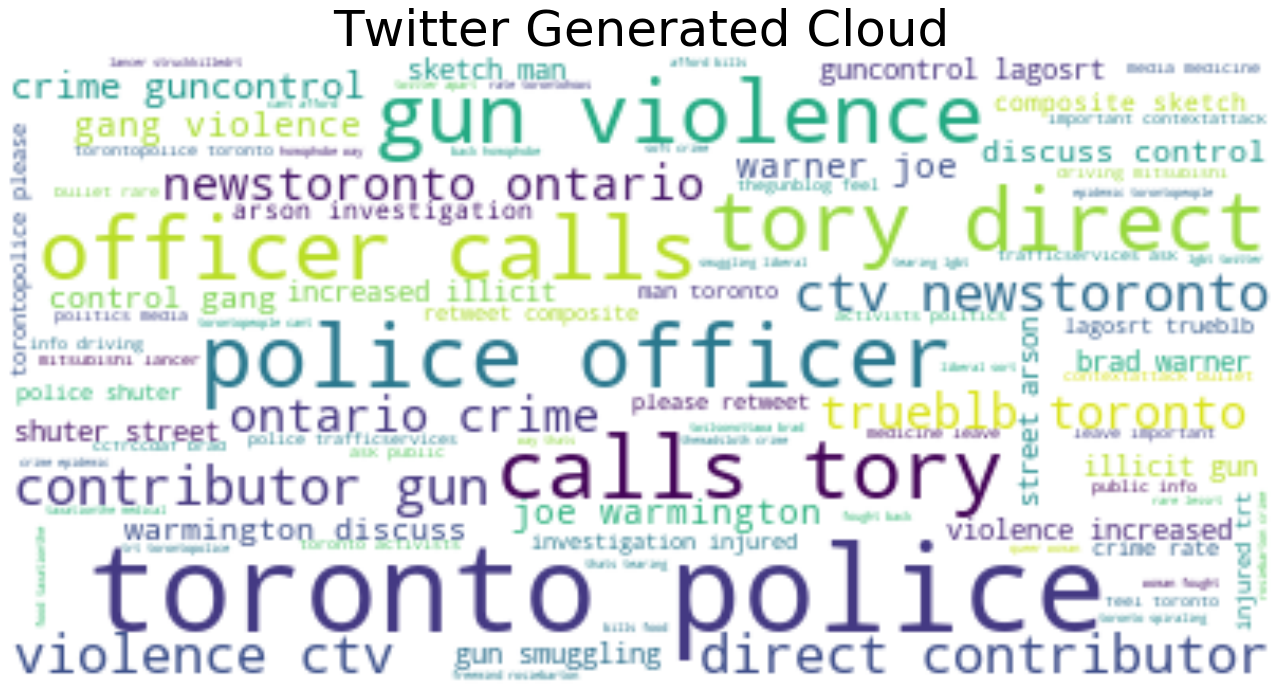

In [71]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
#plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=20)
plt.axis("off")
#f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=50)
plt.axis("off")
plt.savefig("Images_Project/Twitter.png")
plt.show()


## Staring From Rental Data

In [72]:
Rental_DF = pd.DataFrame(pd.read_csv("Toronto_apartment_rentals_2018.csv"))

In [73]:
Rental_DF.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,LatLong
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,"$2,450.00","43.5816391,-79.648193"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,"$2,150.00","43.6430505,-79.3916429"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,"$1,950.00","43.6606054,-79.3786354"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,"$2,900.00","43.6410868,-79.3814048"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,"$1,800.00","43.6524873,-79.3896218"


In [74]:
# Convert Price column string value to float
Rental_DF["Price"] = Rental_DF["Price"].replace('[\$,]', '', regex=True).astype(float)
Rental_DF.head()

,Bedroom,Bathroom,Den,Address,Lat,Long,Price,LatLong
0,2,2.0,0,"3985 Grand Park Drive, 3985 Grand Park Dr, Mis...",43.581639,-79.648193,2450.0,"43.5816391,-79.648193"
1,1,1.0,1,"361 Front St W, Toronto, ON M5V 3R5, Canada",43.643051,-79.391643,2150.0,"43.6430505,-79.3916429"
2,1,1.0,0,"89 McGill Street, Toronto, ON, M5B 0B1",43.660605,-79.378635,1950.0,"43.6606054,-79.3786354"
3,2,2.0,0,"10 York Street, Toronto, ON, M5J 0E1",43.641087,-79.381405,2900.0,"43.6410868,-79.3814048"
4,1,1.0,0,"80 St Patrick St, Toronto, ON M5T 2X6, Canada",43.652487,-79.389622,1800.0,"43.6524873,-79.3896218"


## Pulling Crime Data

In [75]:
Crime_DF = pd.DataFrame(pd.read_csv("MCI_2014_to_2018.csv"))
Crime_DF.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId,LatLong
0,-79.385193,43.659229,2349,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,2130,210,Theft Over,...,Friday,10,Theft Over,D52,76,Bay Street Corridor (76),43.659229,-79.385193,2001,"43.6592293,-79.3851929"
1,-79.425400,43.777592,2350,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1457,100,Pointing A Firearm,...,Wednesday,0,Assault,D32,36,Newtonbrook West (36),43.777592,-79.425400,2002,"43.7775917,-79.4253998"
2,-79.425400,43.777592,2351,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,1610,100,Robbery With Weapon,...,Wednesday,0,Robbery,D32,36,Newtonbrook West (36),43.777592,-79.425400,2003,"43.7775917,-79.4253998"
3,-79.210373,43.801727,2352,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,2120,200,B&E,...,Wednesday,1,Break and Enter,D42,132,Malvern (132),43.801727,-79.210373,2004,"43.8017273,-79.2103729"
4,-79.254334,43.835884,2354,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,1430,100,Assault,...,Wednesday,20,Assault,D42,130,Milliken (130),43.835884,-79.254334,2005,"43.8358841,-79.2543335"


In [76]:
# Rental price (bin)
bins=[50.90,1000.90,2000.90,3000.90,4000.90,5000.90,10000.90,50000.90,600000.90]
group_name=["50-1000$","1001-2000$","2001-3000$","3001-4000$","4001-5000$","5001-10000$","10001-50000$","50001-600000$"]
Rental_DF["Price Range"] = pd.cut(Rental_DF["Price"],bins,labels=group_name)
groupAnalysis_ByRentalPrice = Rental_DF.groupby(['Price Range'])
Property_count=groupAnalysis_ByRentalPrice["Address"].count()
Rental_analysis=pd.DataFrame({"Total Rental Properties":Property_count})

Rental_analysis

,Total Rental Properties
Price Range,
50-1000$,41
1001-2000$,463
2001-3000$,511
3001-4000$,90
4001-5000$,11
5001-10000$,4
10001-50000$,1
50001-600000$,3


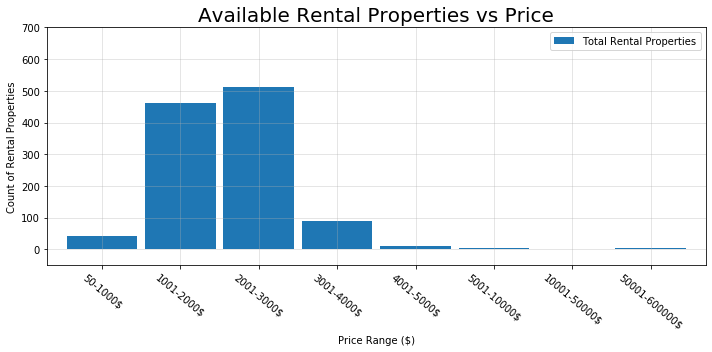

In [77]:
#Plot the bar graph for Rental properties by price range

Rental_analysis.plot.bar(width=.9,figsize=(10,5))
# Orient widths. Add labels, tick marks, etc. 
plt.title("Available Rental Properties vs Price",fontsize=20)
plt.xlabel("Price Range ($)",fontsize=10)
plt.ylabel("Count of Rental Properties",fontsize=10)
plt.ylim(-50,700)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()
plt.savefig("Images_Project/RentalPropertiesVSPrice.png")
plt.show()

In [78]:
# Maximum Available Rental Properties and Price Range
Rental_Avl_Properties=pd.DataFrame(Rental_analysis.iloc[Rental_analysis["Total Rental Properties"].values.argmax()])
Rental_Avl_Properties


,2001-3000$
Total Rental Properties,511


In [79]:
# Top 5 Expensive Neighborhood 

data=Rental_DF[["Price","Address","Bedroom","Bathroom","Lat","Long"]]
Top_data=pd.DataFrame(data)
Top_data1=Top_data.sort_values("Price",ascending=False)
Top_data1.head()

,Price,Address,Bedroom,Bathroom,Lat,Long
238,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
129,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
371,535000.0,"101 Charles St, TORONTO, ON, M4Y 1V2",1,1.0,43.669593,-79.380580
917,36900.0,", TORONTO M4T 1P3 ON, Canada",2,1.0,43.690463,-79.381576
952,9750.0,"311 Bay St, Toronto, ON M5H 4G5, Canada",2,2.5,43.649783,-79.380440


In [80]:
# Top 5 Low Cost Neighborhood 
Low_data=Top_data.sort_values("Price")
Low_data.head()

,Price,Address,Bedroom,Bathroom,Lat,Long
816,65.0,"Euclid Ave, Toronto, ON, Canada",1,2.0,43.658689,-79.412577
973,99.0,"2121 Lake Shore Blvd W, Etobicoke, ON M8V 4E9,...",1,2.0,43.627447,-79.478374
794,99.0,"8 Wellesley St E, Toronto, ON M4Y 3B2, Canada",1,1.0,43.665233,-79.384293
761,150.0,", Toronro M4V 1N5 ON, Canada",1,1.0,43.686511,-79.399522
1110,300.0,"195 Wynford Dr, North York, ON M3C 3P3, Canada",1,1.0,43.723587,-79.324879


In [81]:
Crime_DF.columns


Index(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype', 'ucr_code', 'ucr_ext', 'offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour', 'MCI', 'Division', 'Hood_ID',
       'Neighbourhood', 'Lat', 'Long', 'ObjectId', 'LatLong'],
      dtype='object')

In [82]:
Crime_Data=Crime_DF[['event_unique_id', 'occurrencedate', 'reporteddate',
       'premisetype','offence', 'reportedyear',
       'reportedmonth', 'reportedday', 'reporteddayofyear',
       'reporteddayofweek', 'reportedhour', 'occurrenceyear',
       'occurrencemonth', 'occurrenceday', 'occurrencedayofyear',
       'occurrencedayofweek', 'occurrencehour','Neighbourhood', 'MCI','Division']]
Crime_Data

,event_unique_id,occurrencedate,reporteddate,premisetype,offence,reportedyear,reportedmonth,reportedday,reporteddayofyear,reporteddayofweek,reportedhour,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,Neighbourhood,MCI,Division
0,GO-20149004286,2014-06-20T10:55:00.000Z,2014-06-20T13:20:00.000Z,Apartment,Theft Over,2014,June,20,171,Friday,13,2014.0,June,20.0,171.0,Friday,10,Bay Street Corridor (76),Theft Over,D52
1,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,Pointing A Firearm,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Newtonbrook West (36),Assault,D32
2,GO-20142411379,2014-07-02T00:20:00.000Z,2014-07-02T02:58:00.000Z,Outside,Robbery With Weapon,2014,July,2,183,Wednesday,2,2014.0,July,2.0,183.0,Wednesday,0,Newtonbrook West (36),Robbery,D32
3,GO-20142412127,2014-07-02T01:30:00.000Z,2014-07-02T05:40:00.000Z,House,B&E,2014,July,2,183,Wednesday,5,2014.0,July,2.0,183.0,Wednesday,1,Malvern (132),Break and Enter,D42
4,GO-20142417548,2014-07-02T20:52:00.000Z,2014-07-02T20:57:00.000Z,Commercial,Assault,2014,July,2,183,Wednesday,20,2014.0,July,2.0,183.0,Wednesday,20,Milliken (130),Assault,D42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167520,GO-2018885860,2018-05-16T20:30:00.000Z,2018-05-16T21:57:00.000Z,Outside,Theft Of Motor Vehicle,2018,May,16,136,Wednesday,21,2018.0,May,16.0,136.0,Wednesday,20,Victoria Village (43),Auto Theft,D54
167521,GO-2018939395,2018-05-24T18:00:00.000Z,2018-05-25T02:58:00.000Z,Outside,Theft Of Motor Vehicle,2018,May,25,145,Friday,2,2018.0,May,24.0,144.0,Thursday,18,East End-Danforth (62),Auto Theft,D55
167522,GO-2018940481,2018-05-24T19:00:00.000Z,2018-05-25T08:59:00.000Z,Outside,Theft Of Motor Vehicle,2018,May,25,145,Friday,8,2018.0,May,24.0,144.0,Thursday,19,Birchcliffe-Cliffside (122),Auto Theft,D41
167523,GO-2018940756,2018-05-24T17:00:00.000Z,2018-05-25T11:05:00.000Z,Outside,Theft Of Motor Vehicle,2018,May,25,145,Friday,11,2018.0,May,24.0,144.0,Thursday,17,West Humber-Clairville (1),Auto Theft,D23


In [83]:
# Crime Analysis by Majior Crime Indicator
Crime_Analysis = Crime_Data.groupby(['MCI'])
Count_Offence=Crime_Analysis["event_unique_id"].count()
Offence_data=pd.DataFrame({"Total Count of Offence":Count_Offence})
Offence_data

,Total Count of Offence
MCI,
Assault,90878
Auto Theft,18178
Break and Enter,34911
Robbery,18128
Theft Over,5430


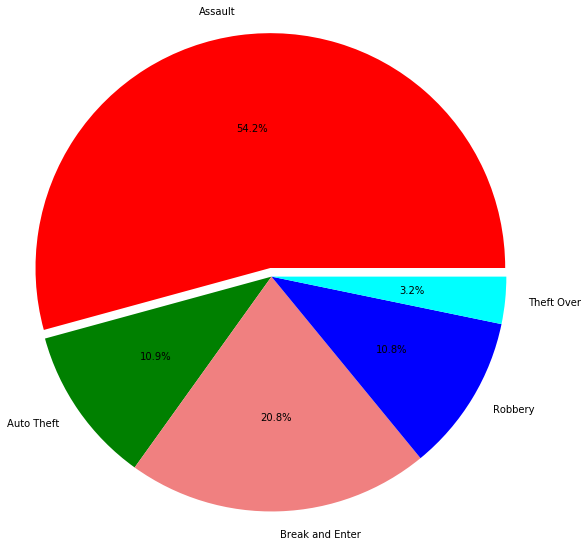

In [84]:
#Plot the Pie Chart for Majior Crime Indicator

x=["Assault","Auto Theft","Break and Enter","Robbery","Theft Over"]
explode_size = (0.1, 0, 0, 0, 0)
colors_s=[ 'red', 'green','lightcoral', 'blue', 'cyan']
plt.pie(Offence_data["Total Count of Offence"], labels=x, colors=colors_s, explode=explode_size, autopct="%1.1f%%",radius=1.8 * 1.5)

# Save the Figure
plt.savefig("Images_Project/MCI_pie.png")
# Show the Figure
plt.show()

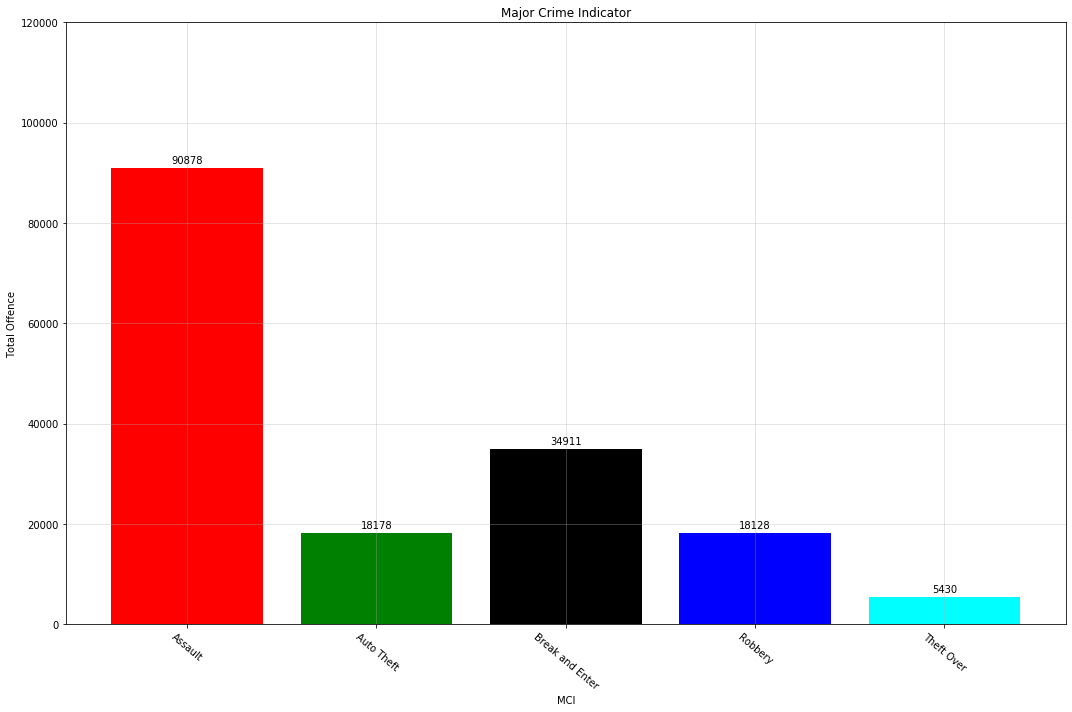

In [85]:
#Plot the bar graph for Majior Crime Indicator

x=["Assault","Auto Theft","Break and Enter","Robbery","Theft Over"]
fig, ax = plt.subplots(figsize=(15, 10))

rect1=ax.bar(x,Offence_data["Total Count of Offence"],color=[ 'red', 'green','black', 'blue', 'cyan'])

# Orient widths. Add labels, tick marks, etc. 
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rect1)
plt.title("Major Crime Indicator")
plt.xlabel("MCI")
plt.ylabel("Total Offence")

#Lable Each Bar
plt.ylim(0,120000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

# Save the Figure
plt.savefig("Images_Project/MCI_BAR.png")
# Show the Figure
plt.show()

In [86]:
#Crime Analysis by year from 2013 to 2018
Crime_Data1 =  Crime_Data.loc[Crime_Data['occurrenceyear'] > 2013.0 ] 

Crime_Analysis1 = Crime_Data1.groupby(['occurrenceyear'])
Count_by_year=Crime_Analysis1["event_unique_id"].count()
CountByYear_Data=pd.DataFrame({"Total count of offence":Count_by_year})


CountByYear_Data


,Total count of offence
occurrenceyear,
2014.0,31628
2015.0,32282
2016.0,32751
2017.0,34457
2018.0,35382


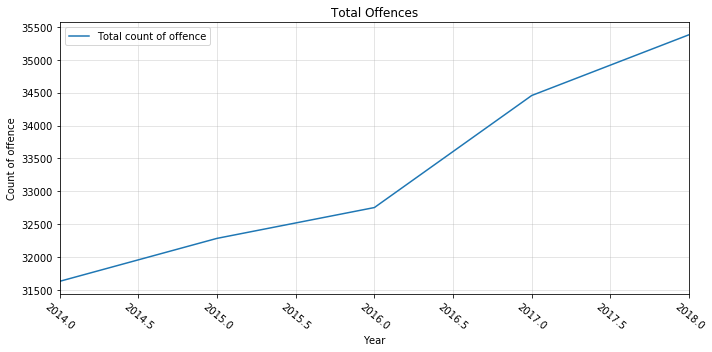

In [87]:
#Plot the line graph for Total offence by Year 2000 to 2018



CountByYear_Data.plot(figsize=(10, 5))

# Orient widths. Add labels, tick marks, etc. 
plt.title("Total Offences")

plt.xlabel("Year")
plt.ylabel("Count of offence")
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

# Save the Figure
plt.savefig("Images_Project/TotalOffences_Across_Years.png")
# Show the Figure
plt.show()

In [88]:
# Crime Analysis by Most Occurence of the week day
Crime_Analysis2 = Crime_Data.groupby(['occurrencedayofweek'])
CountByDay=Crime_Analysis2["event_unique_id"].count()
week=CountByDay[1]+CountByDay[4]+CountByDay[5]+CountByDay[6]
weekend=CountByDay[0]+CountByDay[2]+CountByDay[3]
OffenceByDay_data=pd.DataFrame({"Days":["Week day's","Weekend"],"Total Count of Offence":[week,weekend]})
OffenceByDay_data=OffenceByDay_data.set_index("Days")

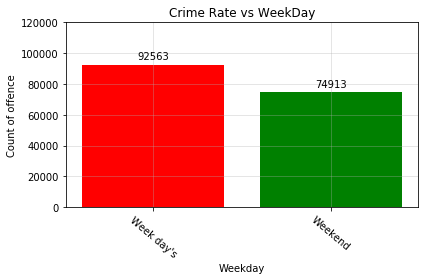

In [89]:
#Plot the Bar graph for Total offence by Weekday's
x=["Week day's","Weekend"]
fig, ax = plt.subplots()
bar1=ax.bar(x,OffenceByDay_data["Total Count of Offence"],color=[ 'red', 'green'])

# Orient widths. Add labels, tick marks, etc. 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
plt.title("Crime Rate vs WeekDay")
plt.xlabel("Weekday")
plt.ylabel("Count of offence")
plt.ylim(0,120000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()
# Save the Figure
plt.savefig("Images_Project/CrimeVsDaysBar.png")
# Show the Figure
plt.show()

In [90]:
# Crime Analysis by Time of the day

bins=[0,6,12,18,24]
group_name=["12-6am","6am-12pm","12-6pm","6pm-12am"]
Crime_Data1["Time of Day"] = pd.cut(Crime_Data1["occurrencehour"],bins,labels=group_name)
            


Crime_Analysis2 = Crime_Data1.groupby(['Time of Day','MCI'])
CountByDay=Crime_Analysis2["event_unique_id"].count()
OffenceByDay_data=pd.DataFrame({"Total Count of Offence":CountByDay})





OffenceByDay_data.reset_index(inplace=True)


OffenceByDay_data1=pd.DataFrame(OffenceByDay_data.pivot(index='Time of Day', columns='MCI', values='Total Count of Offence'))


OffenceByDay_data1
OffenceByDay_data1.reset_index(inplace=True)


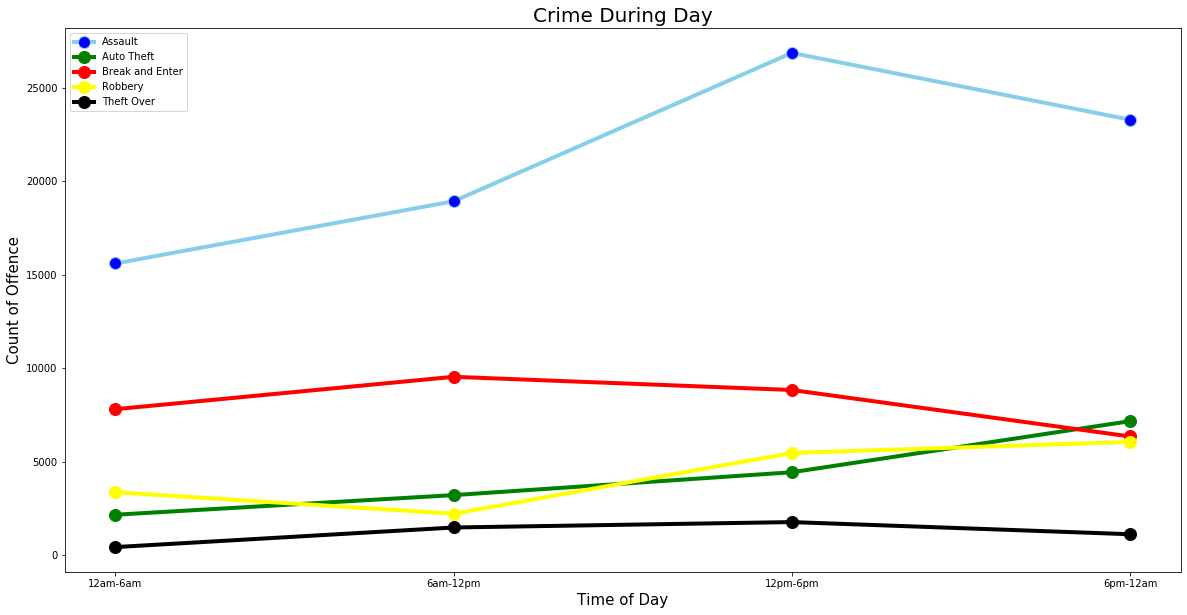

In [91]:


x_axis = np.arange(len(OffenceByDay_data1))

plt.figure(figsize = (20,10))
plt.plot( x_axis, OffenceByDay_data1['Assault'], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label='Assault')
plt.plot( x_axis, OffenceByDay_data1['Auto Theft'], marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4,label='Auto Theft')
plt.plot( x_axis, OffenceByDay_data1['Break and Enter'], marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4,label='Break and Enter')
plt.plot( x_axis, OffenceByDay_data1['Robbery'], marker='o', markerfacecolor='yellow', markersize=12, color='yellow', linewidth=4,label='Robbery')
plt.plot( x_axis, OffenceByDay_data1['Theft Over'], marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=4,label='Theft Over')
plt.legend()

# Set the plot title and axes titles
plt.title("Crime During Day",fontsize=20)
plt.ylabel("Count of Offence",fontsize=15)
plt.xlabel("Time of Day",fontsize=15)
# plt.xticks() set the location and labels of the ticks on the x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["12am-6am", "6am-12pm", "12pm-6pm", "6pm-12am"])


# Save the Figure
plt.savefig("Images_Project/CrimeVSTimeofDay.png")
# Show the Figure
plt.show()




In [92]:
# Crime Analysis by Most Occurence of the Month
Crime_Analysis3 = Crime_Data.groupby(['occurrencemonth'])
CountByMonth=Crime_Analysis3["event_unique_id"].count()
OffenceByMonth_data=pd.DataFrame({"Total Count of Offence":CountByMonth})
OffenceByMonth_data.reset_index(inplace=True)
OffenceByMonth_data

,occurrencemonth,Total Count of Offence
0,April,13414
1,August,14536
2,December,13683
3,February,11809
4,January,13311
5,July,14669
6,June,14450
7,March,13070
8,May,14559
9,November,14662


In [93]:
#Sorting on Months

from sorted_months_weekdays import *

from sort_dataframeby_monthorweek import *


OffenceByMonth_data = Sort_Dataframeby_MonthandNumeric_cols(df = OffenceByMonth_data, monthcolumn='occurrencemonth',numericcolumn='Total Count of Offence')



ModuleNotFoundError: No module named 'sorted_months_weekdays'

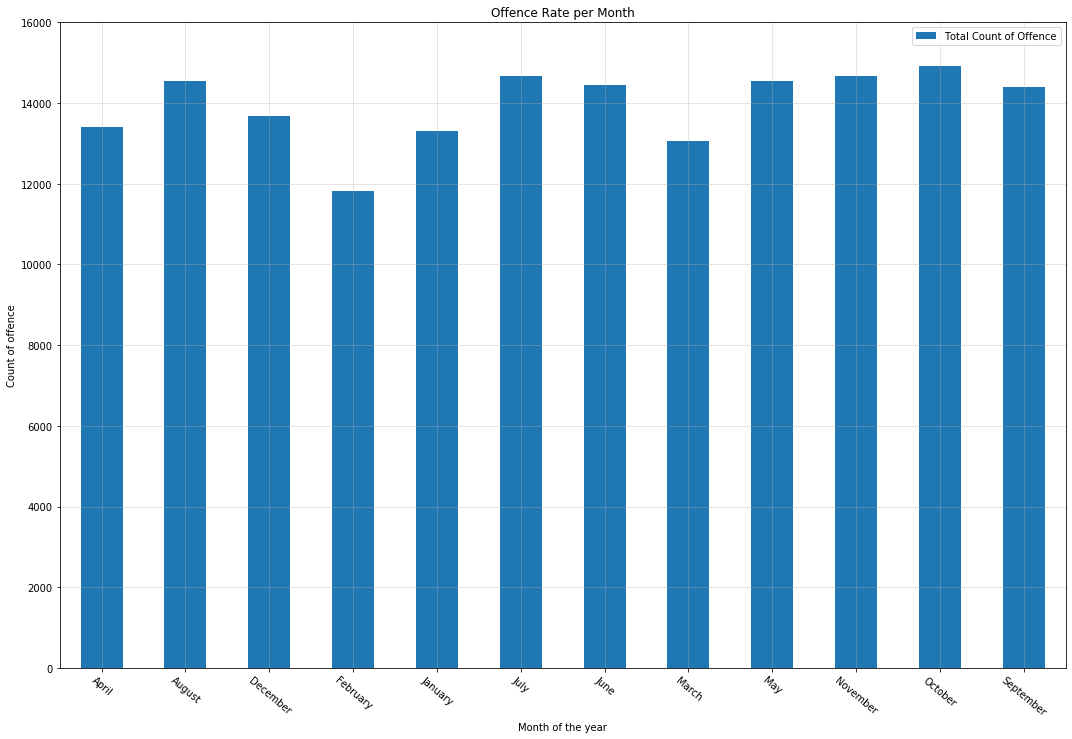

In [94]:
#Plot the Bar graph for Total offence by Month of the year

OffenceByMonth_data.plot.bar(figsize=(15, 10))

# Orient widths. Add labels, tick marks, etc. 
plt.title("Offence Rate per Month")
plt.xlabel("Month of the year")
plt.ylabel("Count of offence")
plt.ylim(0,16000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()

tick_locations = [value for value in np.arange(len(OffenceByMonth_data))]
plt.xticks(tick_locations, [y for y in OffenceByMonth_data['occurrencemonth']])


# Save the Figure
plt.savefig("Images_Project/CrimeRateAcrossMonths.png")
# Show the Figure
plt.show()




In [95]:
# Crime Analysis by season
Crime_Analysis3 = Crime_Data.groupby(['occurrencemonth'])
CountByMonth=Crime_Analysis3["event_unique_id"].count()
spring=CountByMonth[0]+CountByMonth[7]+CountByMonth[8]
summer=CountByMonth[6]+CountByMonth[5]+CountByMonth[1]
fall=CountByMonth[11]+CountByMonth[10]+CountByMonth[9]
winter=CountByMonth[2]+CountByMonth[3]+CountByMonth[4]
OffenceByMonth_data=pd.DataFrame({"Seasons ":["Spring","Summer","Fall","Winter"],"Total Count of Offence":[spring,summer,fall,winter]})
OffenceByMonth_data

,Seasons,Total Count of Offence
0,Spring,41043
1,Summer,43655
2,Fall,43975
3,Winter,38803


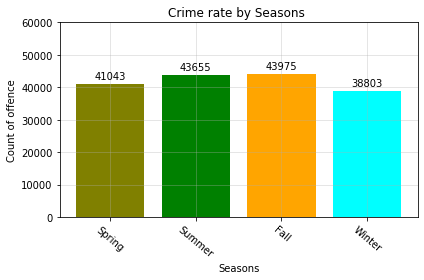

In [96]:

#Plot the Bar graph for Crime Rate by Month of the year
month=["Spring","Summer","Fall","Winter"]
fig, ax = plt.subplots()
bar2=ax.bar(month,OffenceByMonth_data["Total Count of Offence"],color=[ 'olive','green','orange','cyan'])

# Orient widths. Add labels, tick marks, etc. 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar2)
plt.title("Crime rate by Seasons ")
plt.xlabel("Seasons")
plt.ylabel("Count of offence")
plt.ylim(0,60000)
plt.xticks(rotation=-40)
plt.grid(alpha = .4)
plt.tight_layout()
# Save the Figure

plt.savefig("Images_Project/CrimeRatebySeasons.png")
# Show the Figure
plt.show()


In [97]:
#Crime analysis by Neighborhood 
Rent=Rental_DF[["Price","Lat","Long"]]
Rent_d=pd.DataFrame(Rent)
crime=Crime_DF.loc[Crime_DF["occurrenceyear"]==2018,["event_unique_id","MCI","occurrenceyear","Neighbourhood"]]
crime_d=pd.DataFrame(crime)

In [98]:
Crime = crime_d.groupby(['Neighbourhood'])
Count_byA=Crime["event_unique_id"].count()
CountByA_Data=pd.DataFrame({"Total count of offence":Count_byA})


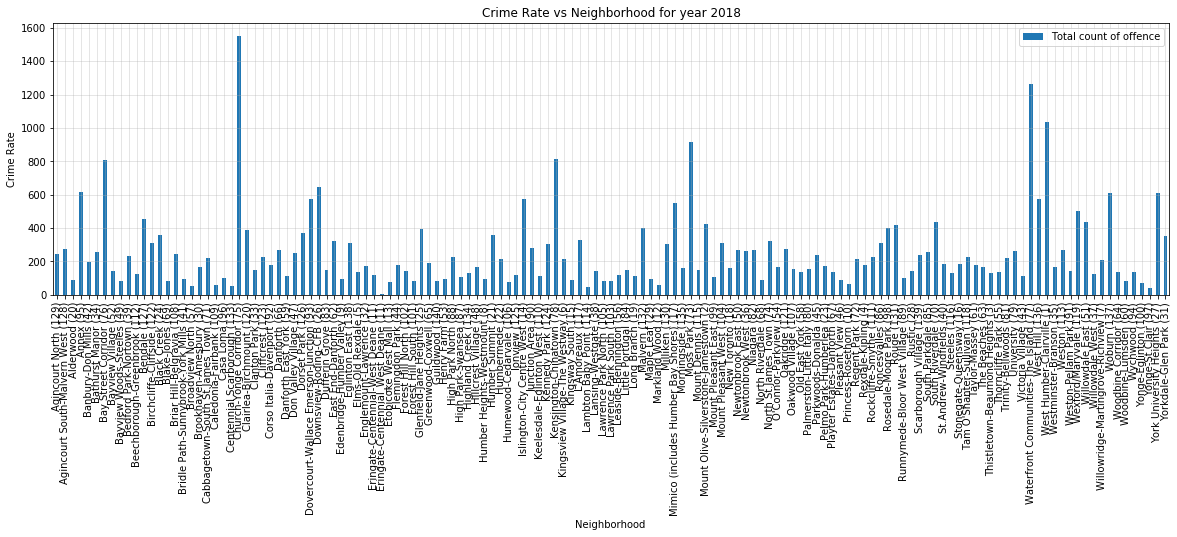

In [99]:
#Plot the Graph Crime Rate by Neghbourhood for Year 2018
CountByA_Data.plot.bar(figsize=(20,5))
# Orient widths. Add labels, tick marks, etc. 
plt.title("Crime Rate vs Neighborhood for year 2018")
plt.xlabel("Neighborhood ")
plt.ylabel("Crime Rate")
plt.grid(alpha = .4)
# Save the Figure
plt.savefig("Images_Project/CrimeVsNeihborhoodBar.png")
# Show the Figure
plt.show()

In [100]:
# Most Safe places to Rent as per crime rate in 2018

safe_Place=CountByA_Data.sort_values("Total count of offence")
safe_Place.head()

,Total count of offence
Neighbourhood,
Eringate-Centennial_West Deane (11),6
Yonge-St.Clair (97),41
Lambton Baby Point (114),44
Broadview North (57),50
Centennial Scarborough (133),52


In [101]:
# Most Unsafe places to Rent as per crime rate in 2018

unsafe_Place=CountByA_Data.sort_values("Total count of offence",ascending=False)
unsafe_Place.head()

,Total count of offence
Neighbourhood,
Church-Yonge Corridor (75),1552
Waterfront Communities-The Island (77),1266
West Humber-Clairville (1),1035
Moss Park (73),914
Kensington-Chinatown (78),815


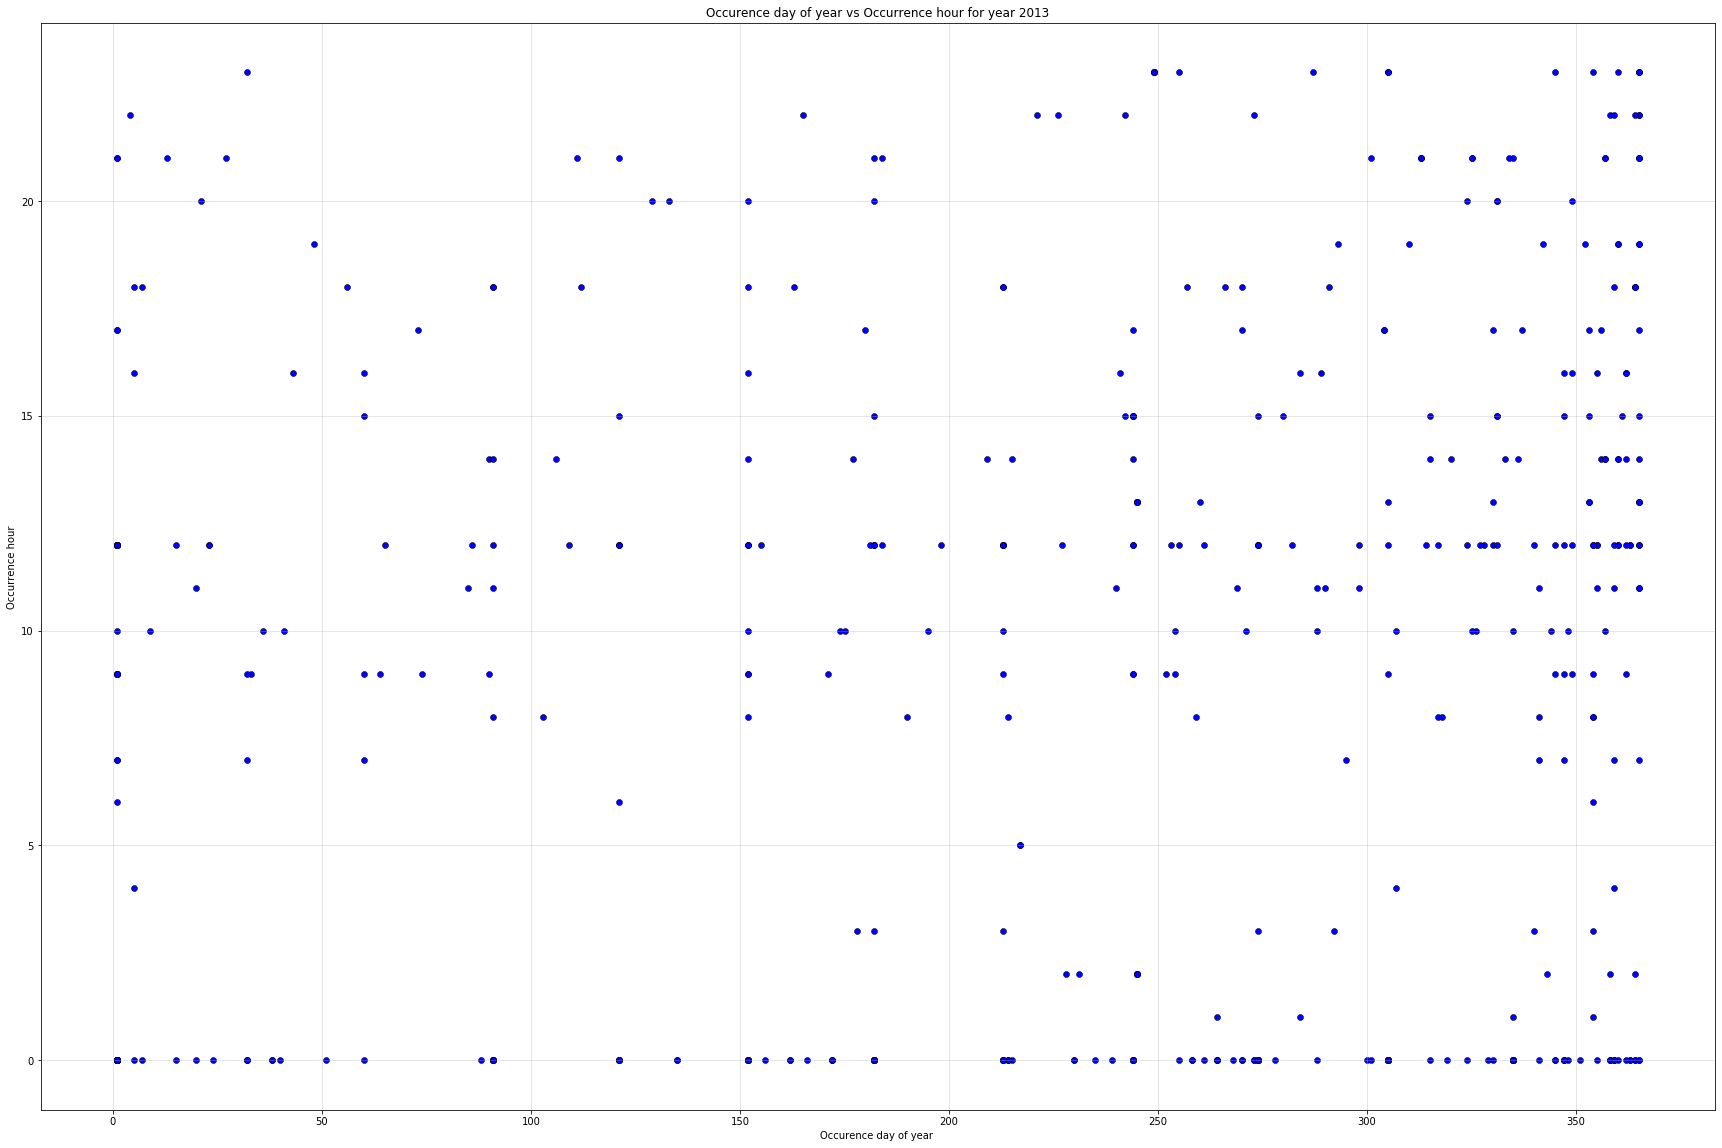

In [102]:
#Scatter plot Occurencedayofyear and occurencehour for one year
plt.figure(figsize=(30,20))
crime1=Crime_DF.loc[Crime_DF["occurrenceyear"]==2013,["occurrencedayofyear","occurrencehour"]]
crime_d1=pd.DataFrame(crime1)
plt.scatter(crime_d1["occurrencedayofyear"],crime_d1["occurrencehour"],linewidths = 0.5, edgecolors = 'black', color = 'blue')
# Orient widths. Add labels, tick marks, etc. 
plt.title("Occurence day of year vs Occurrence hour for year 2013")
plt.xlabel("Occurence day of year ")
plt.ylabel("Occurrence hour")
plt.grid(alpha = .4)
# Save the Figure
plt.savefig("Images_Project/Scatter.png")
# Show the Figure
plt.show()

## GOOGLE MAPS IMPLEMENTATION

In [103]:
#Heatmap to show the affected Neighborhood by Crime rate
Result=Crime_DF[["Lat","Long"]]

Crime_Rate_heatmap = Crime_DF[["Lat","Long","Hood_ID"]]


In [104]:
#set geological center point

Toronto = (43.651070, -79.347015)

m = Crime_Rate_heatmap["Hood_ID"].astype(float)

fig = gmaps.figure(center = Toronto, zoom_level = 14)
heatmap_layer = gmaps.heatmap_layer(Result,
                                   weights = m)
fig.add_layer(heatmap_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [105]:
# Gmap to show available Renatal Properties with neighborhood 

Rental_map = Rental_DF[['Lat', 'Long']]
markers_locations = [tuple(x) for x in Rental_map.values]

In [106]:
Toronto =(43.651205,-79.374889)
fig = gmaps.figure(center=Toronto, zoom_level=15)
markers = gmaps.marker_layer(markers_locations)
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))